## Exploration des données

### 1. Téléchargement et vérification du dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyzazkefe/trashnet")
print("Path to dataset files:", path)

100%|██████████| 40.8M/40.8M [00:02<00:00, 20.5MB/s]

Extracting files...


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/feyzazkefe/trashnet/versions/1


### 2. Inspection des classes

In [7]:
import os

print("Contenu du dossier dataset :")
print(os.listdir(path))


Contenu du dossier dataset :
['dataset-resized']


In [3]:
# filepath: /workspaces/waste-classifier/notebooks/01_data_exploration.ipynb
import os

dataset_dir = os.path.join(path, "dataset-resized")
classes = os.listdir(dataset_dir)
print("Classes disponibles :", classes)

Classes disponibles : ['trash', 'metal', 'glass', 'cardboard', 'paper', 'plastic']


### 3. Compter le nombre d’images par classe

In [14]:
# filepath: /workspaces/waste-classifier/notebooks/01_data_exploration.ipynb
total_images = sum(len(os.listdir(os.path.join(dataset_dir, cls))) for cls in classes)
print(f"Nombre total d'images dans le dataset : {total_images}\n")
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    n_images = len(os.listdir(cls_path))
    print(f"{cls} : {n_images} images")

Nombre total d'images dans le dataset : 2527

trash : 137 images
metal : 410 images
glass : 501 images
cardboard : 403 images
paper : 594 images
plastic : 482 images


### 4. Distribution du nombre d'image par classe

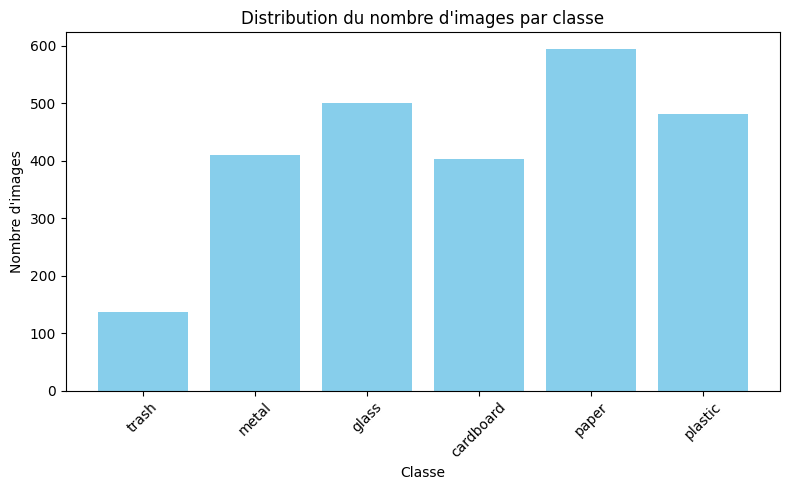

In [15]:
# Distribution du nombre d'image par classe
import matplotlib.pyplot as plt

class_names = []
class_counts = []

for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    n_images = len(os.listdir(cls_path))
    class_names.append(cls)
    class_counts.append(n_images)

plt.figure(figsize=(8, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.title("Distribution du nombre d'images par classe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

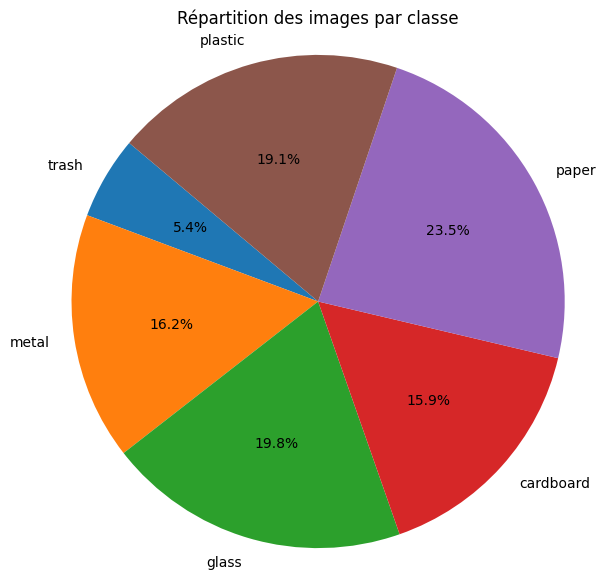

In [16]:
import matplotlib.pyplot as plt

class_names = []
class_counts = []

for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    n_images = len(os.listdir(cls_path))
    class_names.append(cls)
    class_counts.append(n_images)

plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des images par classe")
plt.axis('equal')  # Pour un cercle parfait
plt.show()

### 5. Visualisation de quelques exemples


Exemples pour la classe trash:


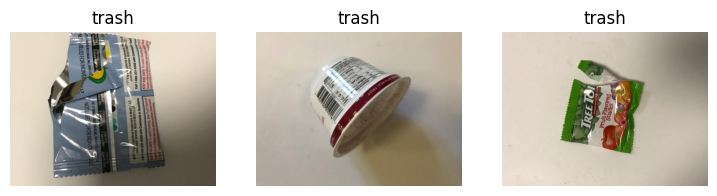


Exemples pour la classe metal:


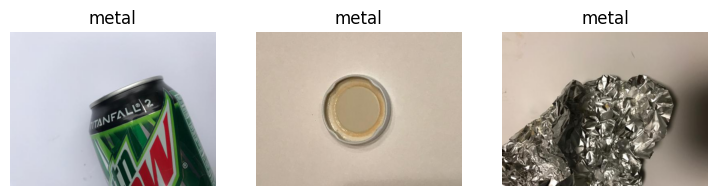


Exemples pour la classe glass:


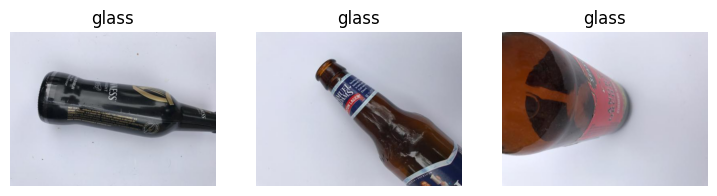


Exemples pour la classe cardboard:


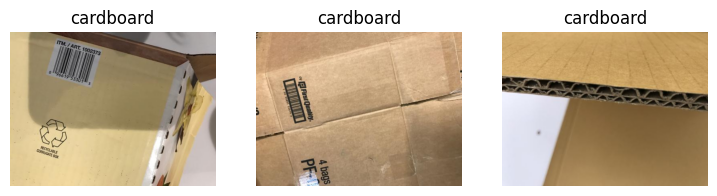


Exemples pour la classe paper:


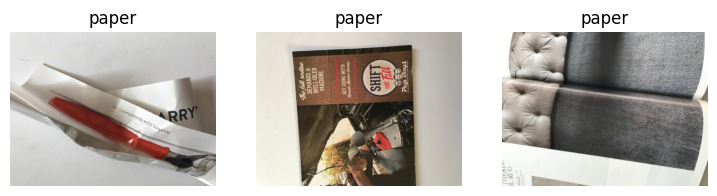


Exemples pour la classe plastic:


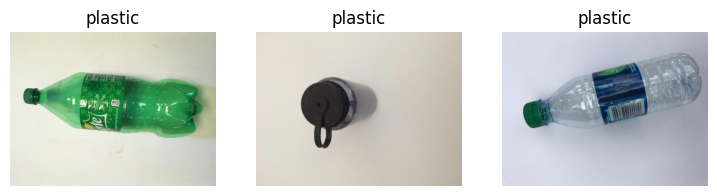

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    images = os.listdir(cls_path)[:3]  # Affiche 3 exemples par classe
    print(f"\nExemples pour la classe {cls}:")
    plt.figure(figsize=(9,3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()

### 6. Analyse des dimensions et formats

In [10]:
from PIL import Image

for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    dims = []
    for img_name in os.listdir(cls_path)[:5]:  # 5 images par classe
        img_path = os.path.join(cls_path, img_name)
        with Image.open(img_path) as img:
            dims.append(img.size)
    print(f"Dimensions pour la classe {cls} :", dims)

Dimensions pour la classe trash : [(512, 384), (512, 384), (512, 384), (512, 384), (512, 384)]
Dimensions pour la classe metal : [(512, 384), (512, 384), (512, 384), (512, 384), (512, 384)]
Dimensions pour la classe glass : [(512, 384), (512, 384), (512, 384), (512, 384), (512, 384)]
Dimensions pour la classe cardboard : [(512, 384), (512, 384), (512, 384), (512, 384), (512, 384)]
Dimensions pour la classe paper : [(512, 384), (512, 384), (512, 384), (512, 384), (512, 384)]
Dimensions pour la classe plastic : [(512, 384), (512, 384), (512, 384), (512, 384), (512, 384)]


### 7. Statistiques de base

In [11]:
from collections import Counter

all_dims = []
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        with Image.open(img_path) as img:
            all_dims.append(img.size)

dim_counter = Counter(all_dims)
print("Nombre de dimensions différentes :", len(dim_counter))
print("Dimension la plus fréquente :", dim_counter.most_common(1))
print("Distribution des dimensions :", dim_counter)

Nombre de dimensions différentes : 1
Dimension la plus fréquente : [((512, 384), 2527)]
Distribution des dimensions : Counter({(512, 384): 2527})


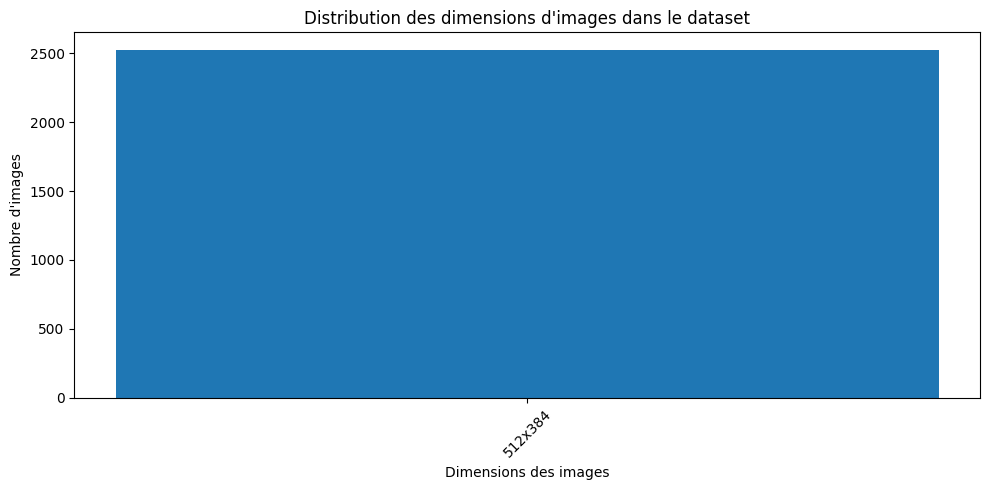

In [12]:
import matplotlib.pyplot as plt

# Regrouper les dimensions sous forme de texte pour l'affichage
dim_labels = [f"{w}x{h}" for (w, h) in dim_counter.keys()]
dim_counts = list(dim_counter.values())

plt.figure(figsize=(10, 5))
plt.bar(dim_labels, dim_counts)
plt.xticks(rotation=45)
plt.xlabel("Dimensions des images")
plt.ylabel("Nombre d'images")
plt.title("Distribution des dimensions d'images dans le dataset")
plt.tight_layout()
plt.show()

### 8. Vérification d'image comrrompue

In [17]:
from PIL import Image

corrupted_images = []

for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            with Image.open(img_path) as img:
                img.verify()
        except Exception as e:
            corrupted_images.append(img_path)

print(f"Nombre d'images corrompues : {len(corrupted_images)}")
if corrupted_images:
    print("Images corrompues :", corrupted_images)
else:
    print("Aucune image corrompue détectée.")

Nombre d'images corrompues : 0
Aucune image corrompue détectée.


### 9. Vérification format de fichier

In [18]:
formats = set()
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    for img_name in os.listdir(cls_path):
        ext = os.path.splitext(img_name)[1].lower()
        formats.add(ext)

print("Formats d'images présents dans le dataset :", formats)

Formats d'images présents dans le dataset : {'.jpg'}


### 10. Note sur (dés)équilibre des classes

In [19]:
import numpy as np

class_counts = [len(os.listdir(os.path.join(dataset_dir, cls))) for cls in classes]
mean_count = np.mean(class_counts)
std_count = np.std(class_counts)

print("Nombre moyen d'images par classe :", mean_count)
print("Écart-type du nombre d'images par classe :", std_count)
if std_count > 0.1 * mean_count:
    print("Attention : déséquilibre notable entre les classes.")
else:
    print("Répartition des classes relativement équilibrée.")

Nombre moyen d'images par classe : 421.1666666666667
Écart-type du nombre d'images par classe : 142.09787315634094
Attention : déséquilibre notable entre les classes.


## Observations sur l’exploration des données

- **Aucun fichier corrompu détecté**  
    Toutes les images du dataset sont lisibles et valides.

- **Formats d’images présents**  
    Uniquement le format : `.jpg`

- **Répartition des classes**  
    Le dataset contient 6 classes de déchets avec le nombre d’images suivant :

    | Classe     | Nombre d’images |
    |------------|:--------------:|
    | trash      | 137            |
    | metal      | 410            |
    | glass      | 501            |
    | cardboard  | 403            |
    | paper      | 594            |
    | plastic    | 482            |

    > **Remarque :** La classe "trash" est sous-représentée par rapport aux autres, ce qui peut entraîner un déséquilibre lors de l’entraînement d’un modèle.

- **Dimensions des images**  
    Toutes les images ont la même dimension : **512 x 384 pixels**  
    Cela facilite le prétraitement et l’utilisation dans des modèles de deep learning.

- **Nombre total d’images**  
    **2527 images** au total dans le dataset.

- **Équilibre des classes**  
    L’écart-type du nombre d’images par classe est relativement élevé (`≈142`), ce qui indique un déséquilibre notable entre les classes.

---

Ces observations permettent d’anticiper les étapes de prétraitement :  
- Possibilité d’appliquer des techniques d’augmentation pour les classes minoritaires.
- Pas besoin de redimensionner les images.
- Vérification du format favorable (uniquement `.jpg`).